In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [4]:
# Read the City Data
city_df = pd.read_csv("data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# add the drivers count for the same city
drivers_count = city_df.groupby("city")["driver_count"].sum()
city_new_df = pd.DataFrame({"Total Drivers per City": drivers_count})
city_new_df = city_new_df.reset_index()
city_new_df.head()

,city,Total Drivers per City
0,Amandaburgh,12
1,Barajasview,26
2,Barronchester,11
3,Bethanyland,22
4,Bradshawfurt,7


In [6]:
# Read the Ride Data
ride_df = pd.read_csv("data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Merge the ride data with city data 
all_data_df = pd.merge(ride_df, city_df, on="city", how="left")
all_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Average Fare ($) Per City
city_avg_fare = ride_df.groupby("city")["fare"].mean()
city_avg_fare

# Total Number of Rides Per City
city_total_rides = ride_df.groupby("city")["fare"].count()
city_total_rides

# Total Number of Drivers Per City
city_total_drivers = ride_df.groupby("city")["fare"].count()
city_total_drivers

# Place information above into a new Data Frame

new_data_df = pd.DataFrame({"Average Fare per City": city_avg_fare, "Total Rides per City": city_total_rides, 
                            "Total Drivers per City": city_total_drivers})
new_data_df = new_data_df.reset_index()
new_data_df.head()



,city,Average Fare per City,Total Rides per City,Total Drivers per City
0,Amandaburgh,24.641667,18,18
1,Barajasview,25.332273,22,22
2,Barronchester,36.422500,16,16
3,Bethanyland,32.956111,18,18
4,Bradshawfurt,40.064000,10,10


In [9]:
# City Type (Urban, Suburban, Rural)
all_data_df2 = pd.merge(new_data_df, city_df, how="left")

all_data_df2["Average Fare per City"] = all_data_df2["Average Fare per City"].map("{:,.2f}".format)
all_data_df2.dtypes

# Convert "Average Fare per City" column to numeri
all_data_df2["Average Fare per City"] = pd.to_numeric(all_data_df2["Average Fare per City"], errors = "ignore")
all_data_df.dtypes

all_data_df2.head()

,city,Average Fare per City,Total Rides per City,Total Drivers per City,driver_count,type
0,Amandaburgh,24.64,18,18,12,Urban
1,Barajasview,25.33,22,22,26,Urban
2,Barronchester,36.42,16,16,11,Suburban
3,Bethanyland,32.96,18,18,22,Suburban
4,Bradshawfurt,40.06,10,10,7,Rural


## Bubble Plot of Ride Sharing Data

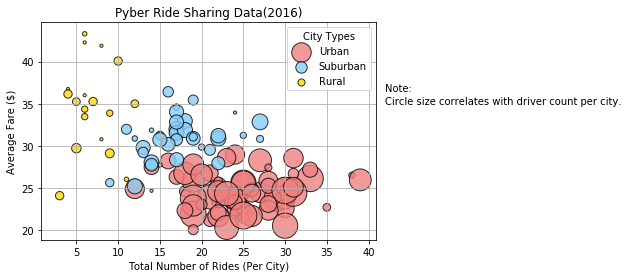

<Figure size 432x288 with 0 Axes>

In [15]:
# Obtain the x and y coordinates for each of the three city types(Urban, Suburban, Rural)

# Urban City Type Data
urban_type_df = all_data_df2.loc[all_data_df2["type"] == "Urban",:]
urban_x_axis = urban_type_df["Total Rides per City"]
urban_y_axis = urban_type_df["Average Fare per City"]
urban_s = urban_type_df["driver_count"]
Urban = plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="Lightcoral", edgecolor="black", s=urban_s*10,
                    alpha=.80)

# Suburban City Type Data
suburban_type_df = all_data_df2.loc[all_data_df2["type"] == "Suburban",:]
suburban_x_axis = suburban_type_df["Total Rides per City"]
suburban_y_axis = suburban_type_df["Average Fare per City"]
suburban_s = suburban_type_df["driver_count"]

Suburban = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors="lightskyblue", edgecolor="black",
                      s=suburban_s*10, alpha=.80)

#Rural City Type Data
rural_type_df = all_data_df2.loc[all_data_df2["type"] == "Rural",:]
rural_x_axis = rural_type_df["Total Rides per City"]
rural_y_axis = rural_type_df["Average Fare per City"]
rural_s = rural_type_df["driver_count"]
Rural = plt.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors="gold", edgecolor="black", s=rural_s*10, alpha=.80)


# Create a legend
plt.legend((Urban, Suburban, Rural),("Urban", "Suburban", "Rural"), scatterpoints=1, markerscale=1, loc="upper right"
          , title= "City Types")

# Add text for the varying sizes
t1 = "Note:"
t2 = "Circle size correlates with driver count per city."
plt.text(42,36.5, t1, ha="left")
plt.text(42, 35, t2, ha="left")

# Add in a grid for the chart
plt.grid()

# Incorporate a text label regarding circle size
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")

#Display Scatter plot
plt.show()

# Save an image of scatter plot
plt.savefig("../Images/Pyber_Ride_Sharing_Data.png")



## Total Fares by City Type

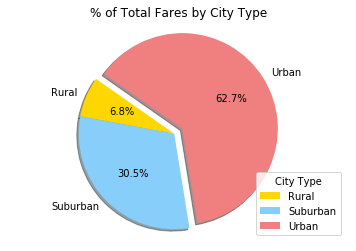

<Figure size 432x288 with 0 Axes>

In [29]:
# Calculate Type Percents
total_fare_df = all_data_df.groupby(["type"]).sum()["fare"]
colors = ["Gold", "Lightskyblue", "Lightcoral"]
explode = ( 0, 0, 0.1)

# Build Pie Chart
plt.pie(total_fare_df, labels=total_fare_df.index.values, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Fares by City Type")
plt.legend(total_fare_df.index.values, title = "City Type", loc = "lower right")
plt.axis('equal')
# Show Figure
plt.show()

# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data_fires.png")

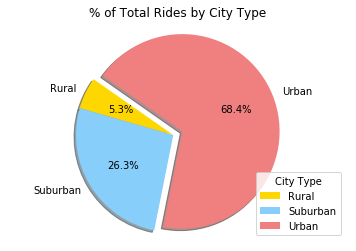

<Figure size 432x288 with 0 Axes>

In [30]:
# Calculate Type Percents
total_rides_df = all_data_df.groupby(["type"]).count()["ride_id"]
colors = ["Gold", "Lightskyblue", "Lightcoral"]
explode = ( 0, 0, 0.1)

# Build Pie Chart
plt.pie(total_rides_df, labels=total_rides_df.index.values, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")
plt.legend(total_rides_df.index.values, title = "City Type", loc = "lower right")
plt.axis('equal')

# Show Figure
plt.show()

# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data_rides_by_city.png")


## Total Drivers by City Type

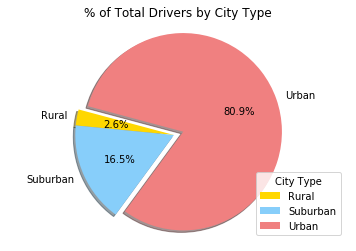

<Figure size 432x288 with 0 Axes>

In [31]:
# Calculate Driver Percents
total_drivers_df = all_data_df2.groupby(["type"]).sum()["driver_count"]
colors = ["Gold", "Lightskyblue", "Lightcoral"]
explode = ( 0, 0, 0.1)

# Build Pie Chart
plt.pie(total_drivers_df, labels=total_drivers_df.index.values, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
plt.legend(total_drivers_df.index.values, title = "City Type", loc = "lower right")
plt.axis('equal')

# Show Figure
plt.show()

# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data_drivers_by_city.png")



Three Observation Trends:
1. Average fare price is lower for urban city type mostlikly due to more drivers.
2. Urban City has the more drivers and rides.
3. Rural and Suburban Pyber drivers make up less than 20% of the total drivers.